In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline


In [2]:
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace", "Henry"],
    "Age": [25, 30, np.nan, 45, 28, 33, 38, np.nan],
    "Salary": [50000, 60000, 55000, 65000, np.nan, 70000, 62000, 58000],
    "Department": ["HR", "Finance", "IT", "Finance", "HR", "IT", "IT", "HR"]
}
df = pd.DataFrame(data)
df


,Name,Age,Salary,Department
0,Alice,25.0,50000.0,HR
1,Bob,30.0,60000.0,Finance
2,Charlie,NaN,55000.0,IT
3,David,45.0,65000.0,Finance
4,Eva,28.0,NaN,HR
5,Frank,33.0,70000.0,IT
6,Grace,38.0,62000.0,IT
7,Henry,NaN,58000.0,HR


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        8 non-null      object 
 1   Age         6 non-null      float64
 2   Salary      7 non-null      float64
 3   Department  8 non-null      object 
dtypes: float64(2), object(2)
memory usage: 388.0+ bytes


In [4]:
df.isnull().sum()


Name          0
Age           2
Salary        1
Department    0
dtype: int64

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df


,Name,Age,Salary,Department
0,Alice,25.0,50000.0,HR
1,Bob,30.0,60000.0,Finance
2,Charlie,31.5,55000.0,IT
3,David,45.0,65000.0,Finance
4,Eva,28.0,NaN,HR
5,Frank,33.0,70000.0,IT
6,Grace,38.0,62000.0,IT
7,Henry,31.5,58000.0,HR


In [8]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df



,Name,Age,Salary,Department
0,Alice,25.0,50000.0,HR
1,Bob,30.0,60000.0,Finance
2,Charlie,31.5,55000.0,IT
3,David,45.0,65000.0,Finance
4,Eva,28.0,60000.0,HR
5,Frank,33.0,70000.0,IT
6,Grace,38.0,62000.0,IT
7,Henry,31.5,58000.0,HR


In [9]:
df.describe()


,Age,Salary
count,8.00000,8.000000
mean,32.75000,60000.000000
std,6.22208,6071.008389
min,25.00000,50000.000000
25%,29.50000,57250.000000
50%,31.50000,60000.000000
75%,34.25000,62750.000000
max,45.00000,70000.000000


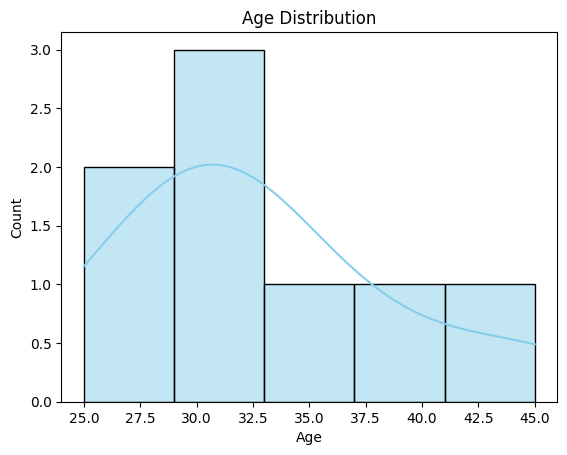

In [10]:
sns.histplot(df['Age'], kde=True, bins=5, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1960\1748937494.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Department", data=df, palette="viridis")


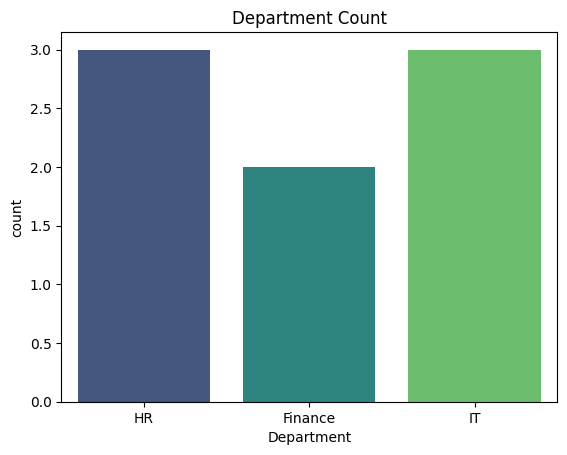

In [11]:
sns.countplot(x="Department", data=df, palette="viridis")
plt.title("Department Count")
plt.show()


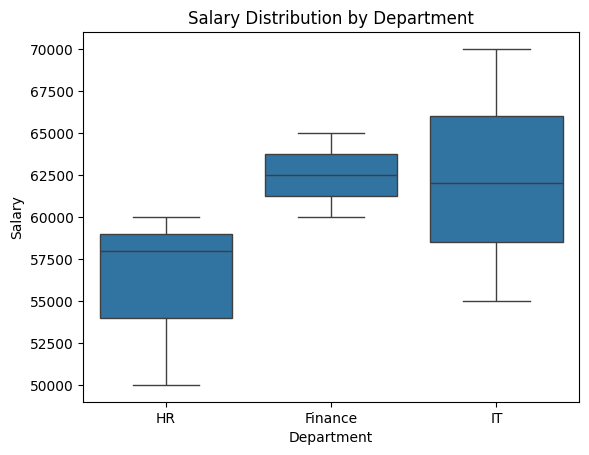

In [12]:
sns.boxplot(x="Department", y="Salary", data=df)
plt.title("Salary Distribution by Department")
plt.show()


In [13]:
df['Experience'] = [2, 5, 3, 10, 4, 8, 6, 7]
df


,Name,Age,Salary,Department,Experience
0,Alice,25.0,50000.0,HR,2
1,Bob,30.0,60000.0,Finance,5
2,Charlie,31.5,55000.0,IT,3
3,David,45.0,65000.0,Finance,10
4,Eva,28.0,60000.0,HR,4
5,Frank,33.0,70000.0,IT,8
6,Grace,38.0,62000.0,IT,6
7,Henry,31.5,58000.0,HR,7


In [14]:
df.corr(numeric_only=True)


,Age,Salary,Experience
Age,1.000000,0.606989,0.819292
Salary,0.606989,1.000000,0.819845
Experience,0.819292,0.819845,1.000000


In [15]:
df.corr(numeric_only=True)


,Age,Salary,Experience
Age,1.000000,0.606989,0.819292
Salary,0.606989,1.000000,0.819845
Experience,0.819292,0.819845,1.000000


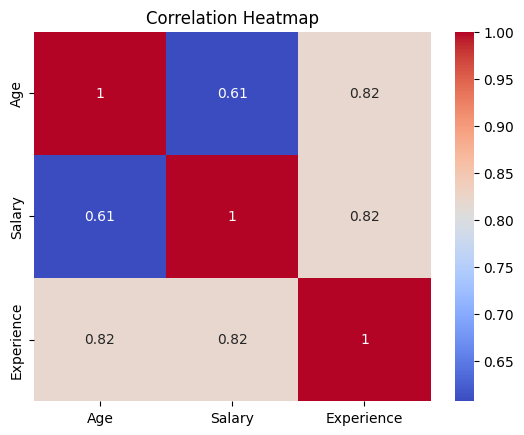

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
df[df['Salary'] > 60000]


,Name,Age,Salary,Department,Experience
3,David,45.0,65000.0,Finance,10
5,Frank,33.0,70000.0,IT,8
6,Grace,38.0,62000.0,IT,6


In [18]:
df.groupby('Department')['Salary'].mean()


Department
Finance    62500.000000
HR         56000.000000
IT         62333.333333
Name: Salary, dtype: float64

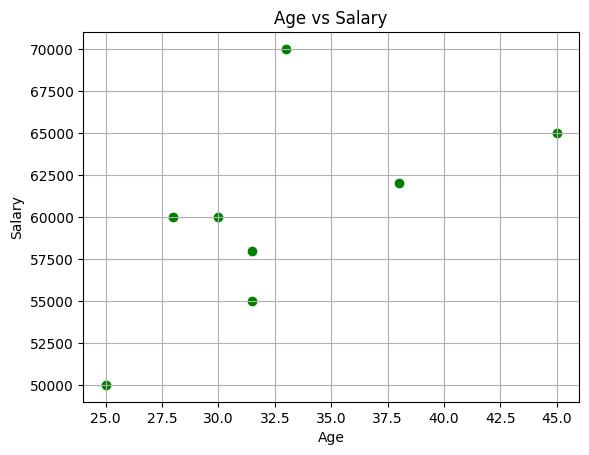

In [19]:
plt.scatter(df['Age'], df['Salary'], color='green')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.grid(True)
plt.show()


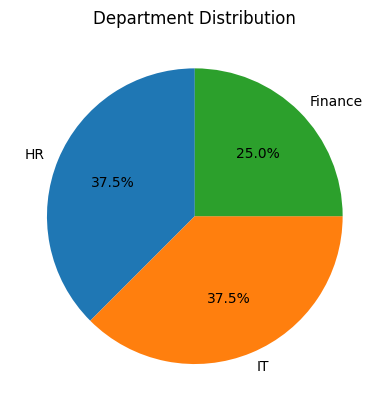

In [20]:
df['Department'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Department Distribution')
plt.ylabel('')
plt.show()


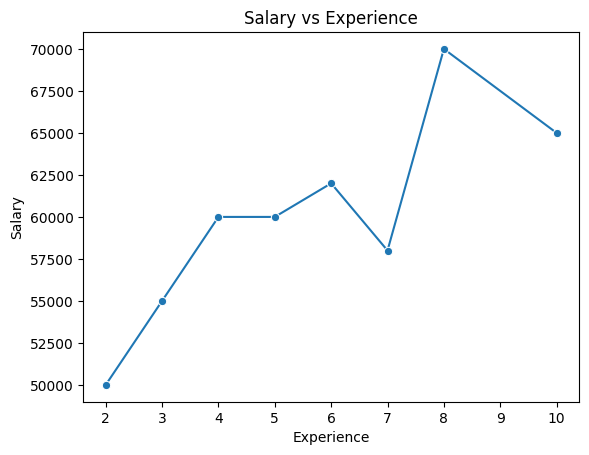

In [21]:
sns.lineplot(x='Experience', y='Salary', data=df, marker='o')
plt.title("Salary vs Experience")
plt.show()


In [22]:
df['Bonus'] = df['Salary'] * 0.1
df


,Name,Age,Salary,Department,Experience,Bonus
0,Alice,25.0,50000.0,HR,2,5000.0
1,Bob,30.0,60000.0,Finance,5,6000.0
2,Charlie,31.5,55000.0,IT,3,5500.0
3,David,45.0,65000.0,Finance,10,6500.0
4,Eva,28.0,60000.0,HR,4,6000.0
5,Frank,33.0,70000.0,IT,8,7000.0
6,Grace,38.0,62000.0,IT,6,6200.0
7,Henry,31.5,58000.0,HR,7,5800.0


In [23]:
df.head()


,Name,Age,Salary,Department,Experience,Bonus
0,Alice,25.0,50000.0,HR,2,5000.0
1,Bob,30.0,60000.0,Finance,5,6000.0
2,Charlie,31.5,55000.0,IT,3,5500.0
3,David,45.0,65000.0,Finance,10,6500.0
4,Eva,28.0,60000.0,HR,4,6000.0


In [24]:
df.to_csv("cleaned_employee_data.csv", index=False)
print("Saved to cleaned_employee_data.csv")


Saved to cleaned_employee_data.csv
